In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from hdf5manager import hdf5manager as h5
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage
import scipy
from skimage.measure import label, regionprops
from scipy.ndimage.filters import gaussian_filter, convolve
from skimage.morphology import disk, watershed
from skimage.morphology import erosion, dilation, opening, closing
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage.filters import maximum_filter
from opticFlow import opticFlow as of
import colorsys
import wholeBrain as wb
import cv2


Error importing slackNotify.py
	 ERROR :  No module named 'slacker'


In [3]:
path = '/Users/emmadionne/Documents/test_angs_mags.hdf5'

h = h5(path)
h.keys()
print(dir(h))
print(h.keys())
mov = h.load('mags')
angs = h.load('rot_angs')
start_stop = h.load('start_stop_index')

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'close', 'keys', 'load', 'open', 'path', 'print', 'save', 'verbose']
['start_stop_index', 'dfof', 'mags', 'rot_angs']


['dfof_mean']

/Users/emmadionne/Documents/test_angs_mags.hdf5 has the following keys:
	- dfof
	- mags
	- rot_angs
/Users/emmadionne/Documents/test_angs_mags.hdf5 has the following attributes:
	- start_stop_index



ValueError: x and y can be no greater than 2-D, but have shapes (4000,) and (4000, 105, 141)

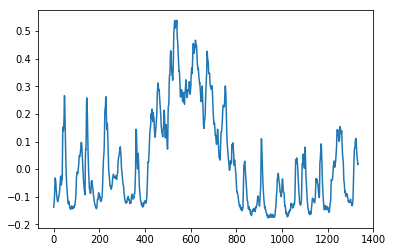

In [4]:
path2 = '/Users/emmadionne/Documents/pyWholeBrain/brain_data.hdf5'
h2 = h5(path2)
h2.keys()
print(h2.keys())
dfof = h2.load("dfof_mean")
h.save({"dfof" : dfof})
plt.plot(dfof)
plt.plot(mov)
plt.xlim([0,1400])

In [6]:
print(mov.shape)

(4000, 105, 141)


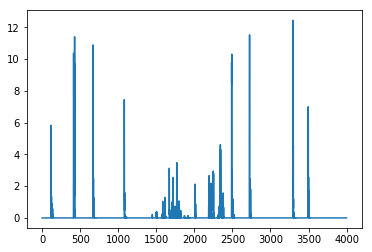

In [7]:
mean = np.nanmean(mov, axis = (1, 2))
plt.plot(mean)

(4000, 105, 141)


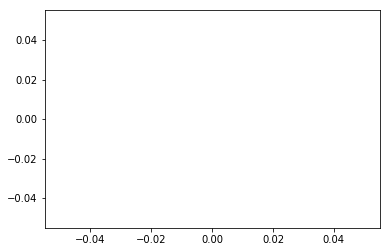

In [8]:
angs = h.load('rot_angs')
print(angs.shape)
angle = np.mean(angs, axis = (1, 2))
plt.plot(angle)

[0. 0. 0. ... 0. 0. 0.]
1.1585295006939789
[0. 0. 0. ... 0. 0. 0.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(4000,)
(4000,)


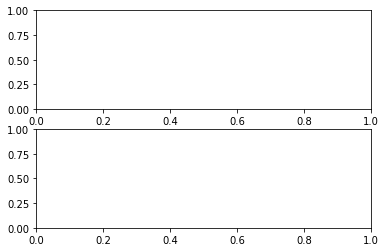

In [9]:
mean2 = np.mean(mov, axis = (1, 2))
print(mean)
print(mean[431])
print(mean2)
print(type(mean))
print(type(mean2))
print(mean.shape)
print(mean2.shape)
figure, a = plt.subplots(2)
#a[0][0].imshow(mean, aspect = "auto")
#a[1][0].imshow(mean2, aspect = "auto")
plt.show()

In [13]:
wb.playMovie(mov)


Playing Movie
-----------------------
preprocessing data...
Pre-processing movie rescaling...

Rescaling Movie
-----------------------
mean: 0.09717086151820375 low: 3 high: 7 std: 2.3813770774755803
newMin: -7.046960370908537
newMax 16.766810403847266
amin 0.0
amax 407.083147251264
newSlope: 15.20861713456773


Movie range normalization: 2.187022488000025
starting video playback..




(-0.5, 140.5, 104.5, -0.5)

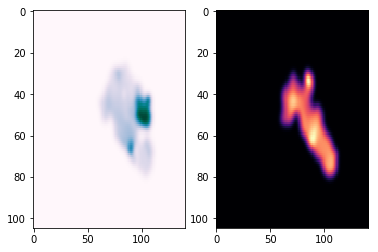

In [11]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(mov[431], aspect = "auto", cmap = "PuBuGn")
axs[0].axis("on")
axs[1].imshow(mov[434], aspect = "auto", cmap = "magma")
axs[1].axis("on")
#plt.colorbar()

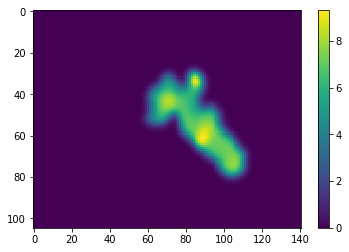

NameError: name 'mean' is not defined

In [12]:
plt.imshow(mov[434], aspect = "auto")
plt.colorbar()
plt.show()


mov2 = mov[434].copy()
mov2[mov2==0]=np.nan
mean2 = np.nanmean(mov2)
print("With nan: " + str(mean))
print("Without nan: " + str(mean2))
mov[np.isnan(mov)] = 0
mean = np.mean(mov[434])

plt.imshow(mov2, aspect = "auto")
plt.colorbar()
plt.show()

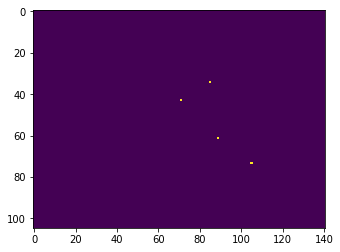

In [13]:
def localMaxima2d(array_2d):
    # finds local maxima of a given 2d array
    neighborhood = np.ones((5,5))
    local_max = maximum_filter(array_2d, footprint=neighborhood)==array_2d
    background = (array_2d==0)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)
    lmax = local_max ^ eroded_background
    return lmax
plt.imshow(localMaxima2d(mov[434]))

In [14]:
#finds the means, including the 0's, in the frame and puts it in a list
def findMeans(array_3d):
    all_means = []
    x = []
    for i, frame in enumerate(array_3d):
        all_means.append(np.mean(frame))
        x.append(i)
    
    #plt.scatter(x, all_means)
    return all_means
    
findMeans(mov)
        
        

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5393333146154218,
 1.8812315421988537,
 5.831614083963566,
 2.655092081754685,
 2.222759005750446,
 1.1911884787114078,
 0.17343143010936612,
 0.540215484357613,
 1.3583825188043837,
 1.2445611879657308,
 0.29628813980963137,
 0.9205346520709573,
 0.020982393144313168,
 0.00616923286801293,
 0.855312649908198,
 

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.4397693574518797,
 6.507647421026223,
 18.52093292975131,
 9.241054781597828,
 6.459278337419307,
 3.699959159874099,
 0.9670524393192281,
 1.93793971887465,
 6.391794914013734,
 4.596814332101958,
 1.1717480158237499,
 3.7313736634695838,
 0.22174517663514673,
 0.09379365356639636,
 3.477197669826565,
 0.0,
 0.

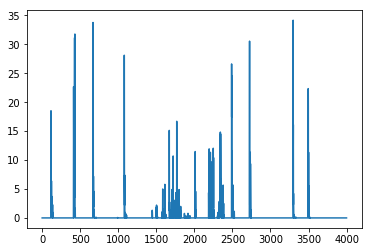

In [15]:
#includes 0s with the standard deviation
def standardDeviation(array_3d):
    all_deviations = []
    x = []
    for i, frame in enumerate(array_3d):
        mean = np.mean(frame)
        x.append(i)
        
        deviations = []
        for r in frame:
            for c in range(len(r)):
                deviations.append((r[c] - mean) ** 2)
        mean1 = np.mean(deviations)
        current_deviation = mean1 ** (1/2)
        all_deviations.append(current_deviation)

    plt.plot(x, all_deviations)
    
    return all_deviations

standardDeviation(mov)
        
        
    

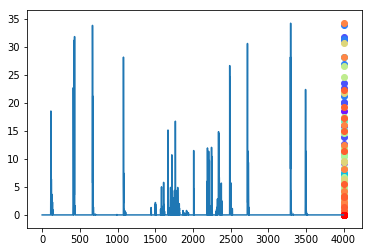

In [20]:
deviations = standardDeviation(mov)
x = len(deviations)
ys = deviations

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for y, c in zip(ys, colors):
    plt.scatter(x, y, color=c)

In [16]:
def common_occurences(array_2d):
    dictionary = {}
    for i in array_2d:
        if i in dictionary:
            dictionary[i] += 1
        else:
            dictionary[i] = 1
    return dictionary

print(common_occurences(findMeans(mov)))

{0.0: 3675, 0.5393333146154218: 1, 1.8812315421988537: 1, 5.831614083963566: 1, 2.655092081754685: 1, 2.222759005750446: 1, 1.1911884787114078: 1, 0.17343143010936612: 1, 0.540215484357613: 1, 1.3583825188043837: 1, 1.2445611879657308: 1, 0.29628813980963137: 1, 0.9205346520709573: 1, 0.020982393144313168: 1, 0.00616923286801293: 1, 0.855312649908198: 1, 0.009272536503547996: 1, 0.14399755691121213: 1, 0.5809848476849229: 1, 0.0039049769526838824: 1, 0.2309485599745854: 1, 0.020586657918655004: 1, 4.951638579613898: 1, 10.36630727332424: 1, 6.417416240287771: 1, 2.7828687962126595: 1, 1.2500777718845342: 1, 0.3715175904830553: 1, 0.3871011754950674: 1, 0.2737146704795191: 1, 4.586898219160199: 1, 3.721851620329706: 1, 2.396127924134868: 1, 7.302746231191187: 1, 4.561666437878259: 1, 11.400428618853645: 1, 1.3981759139706207: 1, 3.08752675700375: 1, 4.309910836873361: 1, 9.688859642439759: 1, 1.1585295006939789: 1, 0.014172063007502896: 1, 0.2455492060557285: 1, 0.5046094583603467: 1, 0

In [17]:
def findMode(array_3d):
    means = findMeans(array_3d)
    mode = common_occurences(means)
    m = []
    for i in means:
        m.append(mode.get(i))
    return m

print(findMode(mov))

[3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3675, 3675, 1, 3675, 3675, 3675, 3675, 1, 1, 1, 1, 1, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 3675, 

In [18]:
def motionCharacterize(array3d):
    brain_magnitude = np.zeros(array3d.shape[0])
    for n, frame in enumerate(array3d):
        brain_magnitude[n] = np.mean(frame)

    win_size = 10
    mag_mean = np.convolve(brain_magnitude, np.ones(win_size)/win_size, mode = 'same')

    threshold = np.zeros(mag_mean.shape)
    threshold[mag_mean > 0] = 1 
    frame_ind = np.where(threshold == 1)

    start = []
    end = []
    for i, frame in enumerate(frame_ind[0]):
        if i == 0:
            start.append(frame)
        elif len(frame_ind[0])-1 == i:   
            end.append(frame)
        elif (frame + 1) != (frame_ind[0][i + 1]):
            end.append(frame)
            start.append(frame_ind[0][i + 1])
            
#     Duration of event frames in seconds
    event_frames = (np.array(end) - np.array(start))/30
    
    mag_per_event = np.zeros(array3d.shape[0])
    duration = np.zeros(array3d.shape[0])
    rest = np.zeros_like(duration)

    for i, st in enumerate(start):
        if i == 0:        
            rest[:st] = st
            rest[end[i]:start[i+1]] = start[i+1] - end[i]
        elif i == len(start)-1:
            rest[end[i]:] = rest.shape[0] - end[i]
        else:
            rest[end[i]:start[i+1]] = start[i+1] - end[i]
        mag_per_event[st:end[i]] = np.sum(array3d[st:end[i]])/event_frames[i]
        duration[st:end[i]] = event_frames[i]

            
# #     Duration intervals
#     frame_durations = []
#     for i in range(len(start)):
#         interval = end[i] - start[i]
#         frame_durations.append(interval)
#     print(frame_durations)
    
    #   Magnitude events
#     fig = plt.figure(figsize = (10,5))
#     plt.plot(brain_magnitude, color='k')
#     plt.plot(mag_mean,color='g')
#     plt.plot(threshold,color='r')
#     plt.ylim([0,2])
#     plt.show()
#     plt.plot(mag_per_event)
#     plt.show()

#     print(frame_durations[1])
#     for i in frame_durations:
#     print(dfDur)

    
    return mag_per_event, duration, rest, start, end

In [19]:
def findEvent(array3d):
    means = findMeans(array3d)
    is_event = []
    for i in means:
        if i > 0:
            is_event.append(1)
        else:
            is_event.append(0)
    return is_event

findEvent(mov)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [20]:
def findRange(array3d):
    return np.max(array3d, axis = (1,2))

print(findRange(mov))

[0. 0. 0. ... 0. 0. 0.]


In [21]:
findEvent(dfof)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [22]:
print(len(dfof))
print(len(mov))

1334
4000


In [23]:
def same_size_up(small, big):
    scalar = len(big)/len(small)
    scaled = []
    index = 0
    count = 0
    for i in range(len(big)):
        if count >= scalar:
            index += 1
            scaled.append(small[index])
            count = 1
        else:
            scaled.append(small[index])
            count += 1
    return scaled

In [24]:
def finding_range_values(dfof): 
    #finding the ranges of snippet of the brain data
    der = np.zeros_like(dfof)*10
    # Brain Activity Boundaries
    for i, val in enumerate(dfof):
        if i == 0 or i == len(dfof) - 1:
            continue
        else:
            der[i] = val - dfof[i-1]
    der *= 10

    d_switch = [] #the decreasing part of the graph 
    u_switch = [] #the increasing part of the graph
    range_list = []

    # Derivative of the graph by points
    for i, val in enumerate(der):
        if i == 0 or i == len(der) - 1:
            continue
        elif (val > 0) and (der[i-1] < 0):
            u_switch.append(i)
        elif (val < 0) and (der[i-1] > 0):
            d_switch.append(i)

    u_switch = np.array(u_switch)/10
    d_switch = np.array(d_switch)/10

    return u_switch, d_switch

def range_of_sections(u_switch, d_switch):
    difference_list = []
    difference_val = 0
    
    for i in range(len(u_switch)): 
        for j in range(len(d_switch)):
            difference_val = abs(d_switch[j] - u_switch[i])
            difference_list.append(difference_val)
    
    return np.around(difference_list, 3)

In [25]:
print(dfof)
print(same_size_up(dfof, mov))
print(mov)

[-0.13750606 -0.12996966 -0.12050748 ...  0.02925072  0.01660987
  0.01909497]
[-0.13750605660348073, -0.13750605660348073, -0.13750605660348073, -0.12996966197568421, -0.12996966197568421, -0.12996966197568421, -0.12050748039043593, -0.12050748039043593, -0.12050748039043593, -0.10948340494627641, -0.10948340494627641, -0.10948340494627641, -0.0934604781632221, -0.0934604781632221, -0.0934604781632221, -0.06777793406543352, -0.06777793406543352, -0.06777793406543352, -0.038255340122145674, -0.038255340122145674, -0.038255340122145674, -0.031795715484091755, -0.031795715484091755, -0.031795715484091755, -0.0380385574073518, -0.0380385574073518, -0.0380385574073518, -0.04510362006606363, -0.04510362006606363, -0.04510362006606363, -0.05954364494482194, -0.05954364494482194, -0.05954364494482194, -0.07183858180403181, -0.07183858180403181, -0.07183858180403181, -0.079287534003495, -0.079287534003495, -0.079287534003495, -0.09130640913679082, -0.09130640913679082, -0.09130640913679082, -0

In [26]:
time[-1]

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs


[-1]

In [27]:
def max_value_of_event(array_3d):
    #rests_events = []
    max_values = []
    events_max = [] 
    means_mov = findMeans(array_3d)
    events = findEvent(array_3d)
    for i in range(len(means_mov)):
        temp_max = float('-Inf')
        if means_mov[i] == 0:
            #rests_events.append(means_mov[i])
            continue
        elif means_mov[i] > 0: 
            for i in range(len(means_mov) - 1):
                temp_max = means_mov[i]
                if temp_max > means_mov[i+1]:
                    continue
                else:
                    temp_max = means_mov[i+1]
            events_max.append(temp_max)
    event_index = 0
    index = 0
    while (index < len(events)):
        if events[index] == 0:
            max_values.append(0)
        else:
            while(events[index] != 0):
                max_values.append(events_max[event_index])
                index += 1
            event_index += 1
    return max_values

print(max_value_of_event(mov))

KeyboardInterrupt: 

In [ ]:
def same_size_down(list_1, list_2):
   #returns the lists with the same size
    print("entered the same_size function")
    new_array = []
    if (len(list_1) > len(list_2)):
        divide = len(list_1) / len(list_2)
        
        if (divide > 2):
            for i in range(len(list_2)):
                new_array.append(list_1[i * int(np.floor(divide))])
        else:
            new_array = list_1[0:len(list_2)]
            
    elif(len(list_2) > len(list_1)):
        divide = len(list_2) / len(list_1)
        
        if (divide > 2):
            for i in range(len(list_1)):
                new_array.append(list_2[i* int(np.floor(divide))])
                
        else:
            new_array = list_2[0:len(list_1)]
    return new_array

In [ ]:
def plotting_mov(array_3d):
    means_mov = findMeans(mov)
    plt.plot(means_mov)
    #plt.plot(new_mov)
    
amount = plotting_mov(mov)
    

In [ ]:
def findMeans(array_3d):
    all_means = []
    x = []
    for i, frame in enumerate(array_3d):
        all_means.append(np.mean(frame))
        x.append(i)
    
    #plt.scatter(x, all_means)
    return all_means

In [59]:
def standard_deviation_y(array_3d):
    deviations = []
    for i in range(len(array_3d)):
        sums = []
        for r in array_3d[i]:
            temp = 0
            for c in r:
                if c != 0:
                    temp += c
            sums.append(temp)
        deviations.append(np.std(sums))
    return deviations

print(standard_deviation_y(mov))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 110.82933329841384, 348.698145085511, 853.5116361278401, 525.7113180051393, 367.11922786324254, 144.67997781021765, 48.22101890735443, 93.34593650183324, 328.3425960958942, 255.49242412111226, 49.98104835242795, 182.73113000927165, 8.110449265316282, 3.045653132992214, 183.60161134054104, 0.0, 0.0, 4.195444263844486, 0.0, 0.0, 0.0, 0.0, 43.26608973613495, 136.09715893574275, 1.917872353803401, 54.416494345841286, 7.4163041030

In [67]:
def standard_deviation_x(array_3d):
    deviations = []
    for i in range(len(array_3d)):
        sums = []
        for c in array_3d[i].transpose():
            temp = 0
            for r in c:
                if r != 0:
                    temp += r
            sums.append(temp)
        deviations.append(np.std(sums))
    return deviations

print(standard_deviation_x(mov))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 112.54294381739518, 282.8336864270337, 890.9292272050277, 449.78155192150604, 353.75033559305075, 216.47988128736466, 37.327053649573934, 107.69793748904335, 300.1177687531409, 231.78952009806318, 66.02355067932285, 176.80611710421817, 7.137603837663869, 2.63792639128992, 175.47452670586014, 0.0, 0.0, 3.7762472916857623, 0.0, 0.0, 0.0, 0.0, 34.4810551233004, 95.57659099452445, 1.6728800509793849, 39.20377823824404, 6.57187798

In [10]:
from scipy.misc import derivative

In [14]:
def f(x):
    return x**2

print(derivative(f, 1.0, dx = 1e-6))
print(derivative(f, 3.75))

2.000000000002
7.5
